In [16]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Importing my data
df = pd.read_csv("../data/Wordle112025.csv")

In [3]:
# Converting Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Adding a month column
df['Month'] = df['Date'].dt.to_period('M')

In [5]:
# Preserving raw Guesses Column
df['Guesses_raw'] = df['Guesses']

In [6]:
# Convert Guesses column to numeric
df['Guesses'] = pd.to_numeric(df['Guesses'], errors='coerce')

In [7]:
# Convert Score column to numeric
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

In [8]:
# Is X
df['Is_X'] = df['Guesses_raw'].astype(str).str.upper().eq("X")

In [9]:
# Is null
df['Is_Null'] = df['Guesses_raw'].isna()

In [10]:
df['Win_Flag'] = df['Winner'].str.upper().eq("YES").astype(int)

In [11]:
df

,Date,Day,Word,Name,Guesses,Score,Time of Day,Winner,Month,Guesses_raw,Is_X,Is_Null,Win_Flag
0,2025-11-30,Sunday,MUGGY,Joshua,5.0,2.0,Morning,No,2025-11,5,False,False,0
1,2025-11-30,Sunday,MUGGY,Kristin,4.0,3.0,Morning,No,2025-11,4,False,False,0
2,2025-11-30,Sunday,MUGGY,Logan,3.0,4.0,Morning,Yes,2025-11,3,False,False,1
3,2025-11-30,Sunday,MUGGY,Alyssa,5.0,2.0,Morning,No,2025-11,5,False,False,0
4,2025-11-30,Sunday,MUGGY,Annette,4.0,3.0,Morning,No,2025-11,4,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,2025-01-01,Wednesday,NERVE,Alyssa,5.0,NaN,Evening,No,2025-01,5,False,False,0
2000,2025-01-01,Wednesday,NERVE,Joshua,4.0,NaN,Evening,Yes,2025-01,4,False,False,1
2001,2025-01-01,Wednesday,NERVE,Mark,4.0,NaN,Morning,Yes,2025-01,4,False,False,1
2002,2025-01-01,Wednesday,NERVE,Annette,4.0,NaN,Morning,Yes,2025-01,4,False,False,1


In [12]:
# Monthly summary
monthly_summary = (
    df.groupby(['Name', 'Month'])
      .agg(
          Win_Count=('Win_Flag', 'sum'),
          Avg_Guesses=('Guesses', 'mean'),
          Avg_Score=('Score', 'mean'),
          X_Counts=('Is_X', 'sum'),
          Null_Counts=('Is_Null', 'sum')
      )
      .reset_index()
)

monthly_summary

,Name,Month,Win_Count,Avg_Guesses,Avg_Score,X_Counts,Null_Counts
0,Alyssa,2025-01,5,3.960000,2.466667,1,5
1,Alyssa,2025-02,11,4.083333,2.500000,0,4
2,Alyssa,2025-03,12,3.862069,2.935484,2,0
3,Alyssa,2025-04,13,3.966667,3.033333,0,0
4,Alyssa,2025-05,8,3.875000,1.612903,0,15
...,...,...,...,...,...,...,...
61,Mark,2025-07,11,4.142857,2.580645,3,0
62,Mark,2025-08,10,3.933333,2.967742,1,0
63,Mark,2025-09,13,3.633333,3.366667,0,0
64,Mark,2025-10,10,4.000000,2.903226,0,1


In [15]:
# --- Difficulty Stats Per Word & Month ---
word_stats = (
    df.groupby(['Month', 'Word'])
      .agg(
          Avg_Guesses=('Guesses', 'mean'),
          X_Counts=('Is_X', 'sum'),
          Attempts=('Guesses', 'count'),
          Win_Count=('Win_Flag','sum')
      )
      .reset_index()
)

# Difficulty score: prioritize X’s, then avg guesses
word_stats['Difficulty_Score'] = word_stats['X_Counts'] * 100 + word_stats['Avg_Guesses']

# --- Hardest Word Per Month ---
hardest_words = (
    word_stats.sort_values(['Month', 'Difficulty_Score'], ascending=[True, False])
              .groupby('Month')
              .head(1)
              .reset_index(drop=True)
)

hardest_words

,Month,Word,Avg_Guesses,X_Counts,Attempts,Win_Count,Difficulty_Score
0,2025-01,WAFER,5.500000,2,4,2,205.500000
1,2025-02,FUZZY,5.666667,3,3,1,305.666667
2,2025-03,BASTE,4.333333,3,3,1,304.333333
3,2025-04,KRILL,4.800000,1,5,3,104.800000
4,2025-05,EAGER,4.666667,2,3,2,204.666667
5,2025-06,COMFY,5.400000,1,5,1,105.400000
6,2025-07,POPPY,5.333333,3,3,2,305.333333
7,2025-08,DAUNT,4.400000,1,5,1,104.400000
8,2025-09,MIGHT,4.600000,1,5,1,104.600000
9,2025-10,WOUND,2.500000,2,4,2,202.500000


In [14]:
monthly_summary[monthly_summary['Month'] == "2025-11"]

,Name,Month,Win_Count,Avg_Guesses,Avg_Score,X_Counts,Null_Counts
10,Alyssa,2025-11,13,3.821429,2.966667,0,2
21,Annette,2025-11,12,3.833333,3.166667,0,0
32,Joshua,2025-11,10,4.000000,3.000000,0,0
43,Kristin,2025-11,13,3.892857,2.900000,2,0
54,Logan,2025-11,9,4.241379,2.666667,1,0
65,Mark,2025-11,7,4.034483,2.866667,1,0


In [17]:
# Add day extract
df['Day'] = df['Date'].dt.day

daily_summary = (
    df[df['Month'].dt.month == 11]  # Filter November only
      .groupby(['Day','Name'])['Guesses']
      .mean()
      .reset_index()
)
daily_summary.head()


,Day,Name,Guesses
0,1,Alyssa,3.0
1,1,Annette,4.0
2,1,Joshua,2.0
3,1,Kristin,5.0
4,1,Logan,5.0


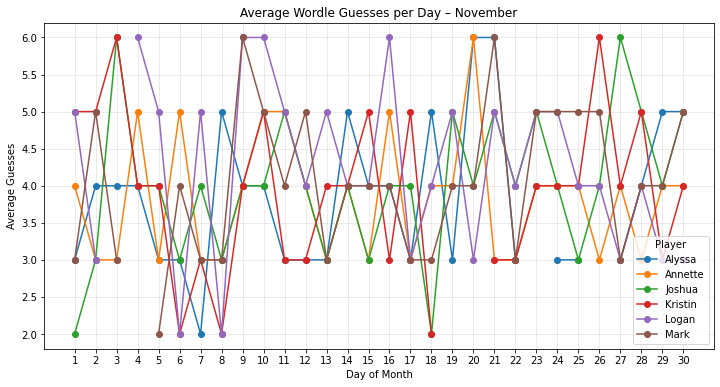

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for name in daily_summary['Name'].unique():
    subset = daily_summary[daily_summary['Name'] == name]
    plt.plot(subset['Day'], subset['Guesses'], marker='o', label=name)

plt.title("Average Wordle Guesses per Day – November")
plt.xlabel("Day of Month")
plt.ylabel("Average Guesses")
plt.xticks(range(1, daily_summary['Day'].max()+1))
plt.legend(title="Player")
plt.grid(alpha=0.3)

plt.show()
